# Studying the Impact of Diabetes on the Human Body
&#x1F3E5;
---

## Data Cleaning


### Data Inspection

##### Import the required libraries

In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Load the data

In [221]:
raw_data = pd.read_csv('..\diabetes_data.csv')

##### Inspect the data

In [222]:
# Data overview
print('Data Overview:')
raw_data.head()

Data Overview:


,gender,age,hypertension,diabetes_pedigree_function,diet_type,star_sign,BMI,weight,family_diabetes_history,social_media_usage,physical_activity_level,sleep_duration,stress_level,pregnancies,alcohol_consumption,diabetes
0,female,NaN,NaN,0.37,paleo,NaN,NaN,197.7,NaN,Occasionally,Sedentary,1.5,Low,NaN,light,1.0
1,male,59.0,0.0,0.73,NaN,Leo,17.1,156.5,0.0,Occasionally,Lightly Active,5.4,Moderate,0.0,none,1.0
2,female,31.0,NaN,NaN,NaN,NaN,22.5,137.8,NaN,Occasionally,Lightly Active,7.6,Low,0.0,light,1.0
3,female,81.0,1.0,0.37,pescatarian,NaN,NaN,108.2,0.0,NaN,Sedentary,7.7,Low,1.0,heavy,NaN
4,NaN,64.0,0.0,0.55,carnivore,NaN,NaN,179.7,NaN,Occasionally,Sedentary,7.8,NaN,0.0,heavy,1.0


Data Overview Notes: the `diabetes_pedrigree_function` is a functions that scores the probability of diabetes based on family history

In [223]:
# Column Information
print('Column Information:')
print('\n')
raw_data.info()

Column Information:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gender                      79954 non-null  object 
 1   age                         80145 non-null  float64
 2   hypertension                80169 non-null  float64
 3   diabetes_pedigree_function  80120 non-null  float64
 4   diet_type                   79939 non-null  object 
 5   star_sign                   79806 non-null  object 
 6   BMI                         79934 non-null  float64
 7   weight                      80126 non-null  float64
 8   family_diabetes_history     79863 non-null  float64
 9   social_media_usage          79968 non-null  object 
 10  physical_activity_level     80032 non-null  object 
 11  sleep_duration              80063 non-null  float64
 12  stress_level                80024 non-null  object 
 13  pregnanc

In [224]:
# Rows Information
print('Total Number of Rows: ' + str(len(raw_data)))

Total Number of Rows: 100000


In [225]:
# Identifying numerical variables versus number-encoded categorical variables
print('Number-encoded Variables Review:')
raw_data.select_dtypes(include='number').agg(['min', 'median', 'max'])

Number-encoded Variables Review:


,age,hypertension,diabetes_pedigree_function,BMI,weight,family_diabetes_history,sleep_duration,pregnancies,diabetes
min,18.0,0.0,0.2,1.8,50.0,0.0,0.0,0.0,0.0
median,45.0,0.0,0.5,27.0,150.9,0.0,5.3,0.0,1.0
max,91.0,1.0,0.8,53.1,250.0,1.0,12.0,5.0,1.0


In [226]:
#Confirm number-encoded categorical variables
print(raw_data['hypertension'].value_counts())
print('\n')
print(raw_data['family_diabetes_history'].value_counts())
print('\n')
print(raw_data['diabetes'].value_counts())

hypertension
0.0    63955
1.0    16214
Name: count, dtype: int64


family_diabetes_history
0.0    55731
1.0    24132
Name: count, dtype: int64


diabetes
1.0    76626
0.0     3616
Name: count, dtype: int64


By studying the results above, it is possible to concluded that:
- `age`, `diabetes_pedrigree_function`, `BMI`, `weight`, `sleep_duration`, and `pregnancies` are numerical variables 
- `hypertension`, `family_diabetes_history`, and `diabetes` are categorical variables enconded as 1 and 0
- `gender`, `diet_type`, `star_sign`, `social_media_usage`, `physical_activity_level`, `stress_level`, and `alcohol_consumption` are categorical variables

In [227]:
# Numerical Variables Statistics
print('Numerical Variables Statistics:')
raw_data[['age','diabetes_pedigree_function', 'BMI', 'weight', 'sleep_duration', 'pregnancies']].describe()

Numerical Variables Statistics:


,age,diabetes_pedigree_function,BMI,weight,sleep_duration,pregnancies
count,80145.000000,80120.000000,79934.000000,80126.000000,80063.000000,80033.000000
mean,45.107306,0.500877,26.978545,150.526618,5.295149,0.758212
std,18.550434,0.173783,6.005039,57.731539,2.842133,1.281326
min,18.000000,0.200000,1.800000,50.000000,0.000000,0.000000
25%,27.000000,0.350000,22.900000,100.300000,3.300000,0.000000
50%,45.000000,0.500000,27.000000,150.900000,5.300000,0.000000
75%,60.000000,0.650000,31.000000,200.400000,7.000000,1.000000
max,91.000000,0.800000,53.100000,250.000000,12.000000,5.000000


### Handling Outliers

#### Review and Remediation

In [228]:
# Create copy of raw data to handle outliers
o_data = raw_data[:]

##### Numerical Variables

**Age**

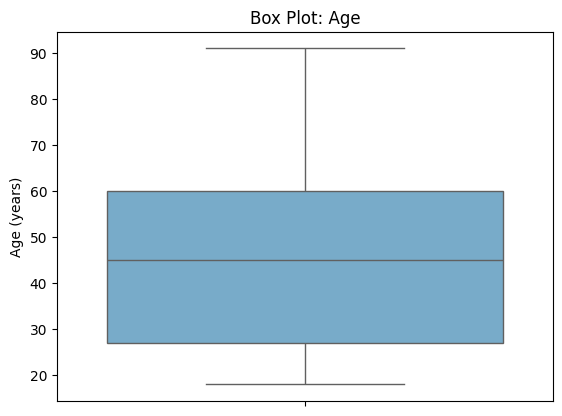

In [229]:
# Age box plot
sns.boxplot(o_data, y='age', color=sns.color_palette("tab20c")[1])
plt.title('Box Plot: Age')
plt.ylabel('Age (years)')
plt.grid(False)

The `age` variable does not present unsual outlier behaviour which would require intervention.

**BMI**

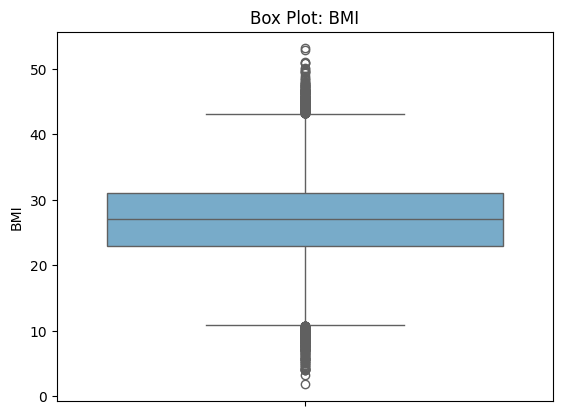

In [230]:
# BMI box plot
sns.boxplot(o_data, y='BMI', color=sns.color_palette("tab20c")[1])
plt.title('Box Plot: BMI')
plt.ylabel('BMI')
plt.grid(False)

In [231]:
# BMI frquency table
BMI_bins = pd.cut(o_data['BMI'], bins=10)
BMI_bins.value_counts().sort_values()

BMI
(47.97, 53.1]        17
(1.749, 6.93]        38
(42.84, 47.97]      297
(6.93, 12.06]       500
(37.71, 42.84]     2576
(12.06, 17.19]     3542
(32.58, 37.71]    11160
(17.19, 22.32]    13579
(27.45, 32.58]    23493
(22.32, 27.45]    24732
Name: count, dtype: int64

The `BMI` variable presents outlier values at both the lower and upper end.
- On the lower end, a BMI index below 15 indicates severe anorexia with a value below 12 being life-threatening. Therefore all BMI values recorded under 12 are most likely collection, data or manipulation errors, which can be removed from the dataset 
- On the upper end BMI index indicators can go as high as the low 60s in the range of severe obesity. However, to reduce the effect of extreme values on the analysis, values above $Q3 + 1.5 * IQR$ will be removed

In [232]:
# Remove lower-bound outliers
lower_bound = 12
o_data = o_data[(o_data['BMI'] >= lower_bound) | (o_data['BMI'].isnull())]

# Remove upper-bound outliers
Q1 = o_data['BMI'].quantile(0.25)
Q3 = o_data['BMI'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
o_data = o_data[(o_data['BMI'] < upper_bound) | (o_data['BMI'].isnull())]

**Weight**

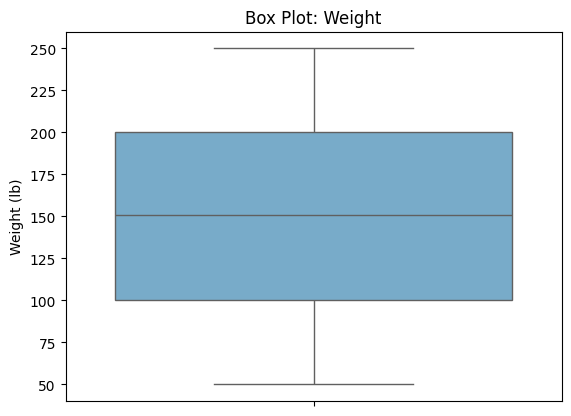

In [233]:
# Weight box plot
sns.boxplot(o_data, y='weight', color=sns.color_palette("tab20c")[1])
plt.title('Box Plot: Weight')
plt.ylabel('Weight (lb)')
plt.grid(False)

The `weight` variable does not present obvious outliers in the data. Nonetheless, assuming the weight data is recorded in lbs, the lower bound of the data can be catalogued as rare for the adult population (in line with the age range present in the data). Hence, further analysis is required.
- The average adult weight is estimated between 130 and 180 lbs, which aligns with the mean weight in the data
- The lower weight limit for adults is estimated at 85 lbs, which is above the minimum weight recorded in the data 

In [234]:
# Studying the weight lower bound
print('The data presents ' + str(len(o_data[(o_data['weight'] < 75) & (o_data['weight'].notnull())])) + ' records with a weight below 75 lbs')

The data presents 9797 records with a weight below 75 lbs


A weight of 75 lbs or (34 kg) is an extreme value for an adult human. This values indicate a data collection error which can heavily skew the analysis results and are best removed from the dataset.

In [235]:
o_data = o_data[(o_data['weight'] >= 75) | (o_data['weight'].isnull())]

**Sleep Duration**

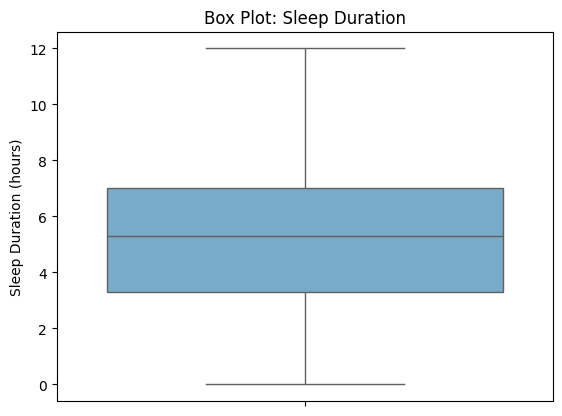

In [236]:
# Sleep Duration box plot
sns.boxplot(o_data, y='sleep_duration', color=sns.color_palette("tab20c")[1])
plt.title('Box Plot: Sleep Duration')
plt.ylabel('Sleep Duration (hours)')
plt.grid(False)

The `sleep duration` variable does not present obvious outliers in the data. However, the lower bound of the data (0 hours sleep) requires further investigation.

In [237]:
# Studying the sleep duration lower bound
print('The data presents ' + str(len(o_data[(o_data['sleep_duration'] <= 2) & (o_data['weight'].notnull())])) + ' records with a sleep hours <= 2')

The data presents 8624 records with a sleep hours <= 2


A record for 2 or less hours of sleep in an extreme value for an adult human. This values indicate a data collection error which can heavily skew the analysis results and are best removed from the dataset.

**Pregnancies**

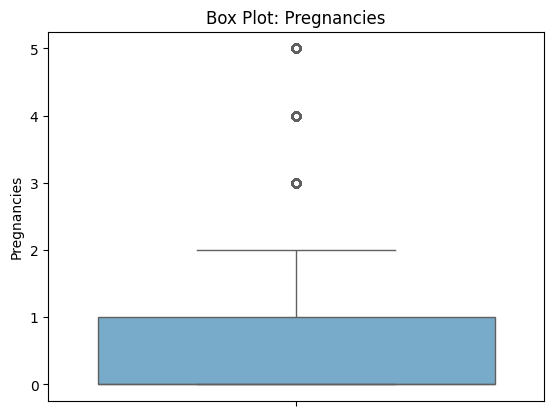

In [238]:
# Pregnancies box plot
sns.boxplot(o_data, y='pregnancies', color=sns.color_palette("tab20c")[1])
plt.title('Box Plot: Pregnancies')
plt.ylabel('Pregnancies')
plt.grid(False)

In [239]:
# Pregnacies frquency table
o_data['pregnancies'].value_counts()

pregnancies
0.0    45871
1.0    12896
3.0     4841
2.0     3228
4.0     3182
5.0     1559
Name: count, dtype: int64

In [240]:
# Compute IQR and identify outliers
Q1 = o_data['pregnancies'].quantile(0.25)
Q3 = o_data['pregnancies'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print('The percentage of outliers present in the preganancies variable is: ' + str(int(len(o_data[(o_data['pregnancies'] < lower_bound) | (o_data['pregnancies'] > upper_bound)])
         /  o_data['pregnancies'].notnull().sum() * 100)) + '%')



The percentage of outliers present in the preganancies variable is: 13%


The `pregnancies` variable contains approximately 13% of values which can be catalogued as outliers. These outliers concentrate in pregnancy records between 3 and 5. Nonetheless, 3 to 5 pregnacies remains viable, though less common, hence indicating the outliers are unlikely to be data collection errors. Eliminating these outliers could lead to the loss of relevant and valuable data. Hence preserving all records for the `pregnancies` variable.

### Handle Missing Values

#### Overview

In [241]:
# Create a copy of the outlier data to handle missing values
mv_data = o_data[:]

In [242]:
# Percentage of missing values in each column
print('Percentage of missing values in each column:')
mv_data.isnull().mean()

Percentage of missing values in each column:


gender                        0.200995
age                           0.198345
hypertension                  0.198133
diabetes_pedigree_function    0.199061
diet_type                     0.200369
star_sign                     0.202505
BMI                           0.201756
weight                        0.220520
family_diabetes_history       0.201454
social_media_usage            0.200660
physical_activity_level       0.200369
sleep_duration                0.198479
stress_level                  0.200581
pregnancies                   0.199586
alcohol_consumption           0.201823
diabetes                      0.197327
dtype: float64

[]

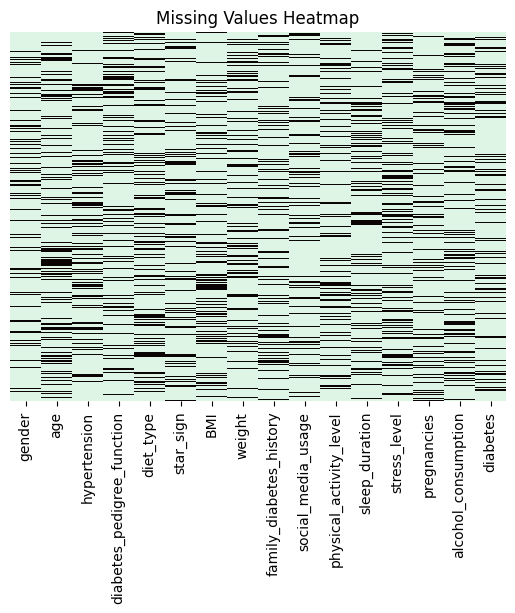

In [243]:
# Missing values heatmap
plt.figure()
plt.title('Missing Values Heatmap')
fig = sns.heatmap(mv_data.isnull(), cmap='mako_r', cbar=False)
fig.set_yticks([])

From the missing values heatmap, it is possible to conclude that missing data is random rather than systematically located within the dataset

#### Data Imputation Analysis

##### Numerical Variables

**Correlation Matrix**

No significant correlations are identified from the correlation matrix.

<Axes: title={'center': 'Correlation Matrix: Numerical Variables'}>

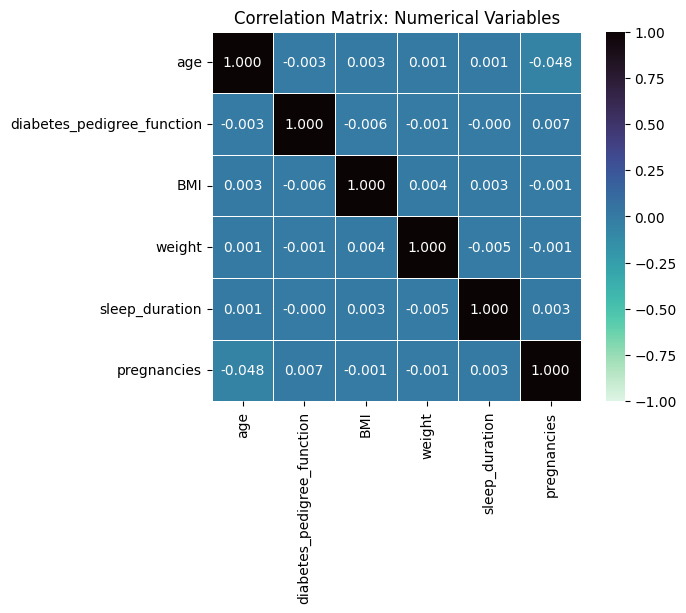

In [244]:
# Correlation Matrix
corr_matrix = mv_data[['age','diabetes_pedigree_function', 'BMI', 'weight', 'sleep_duration', 'pregnancies']].corr()
plt.figure()
plt.title('Correlation Matrix: Numerical Variables')
sns.heatmap(
    corr_matrix,
    annot=True,        
    cmap='mako_r',   
    fmt=".3f",         
    linewidths=0.5,    
    cbar=True,         
    square=True,
    vmin=-1,
    vmax=1,
    center=0     
)

**Data distributions**

Age

Text(0, 0.5, 'Count')

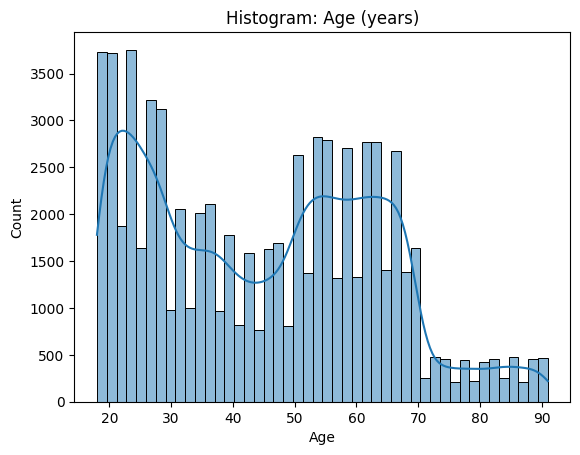

In [245]:
# Age
sns.histplot(mv_data, x = 'age', kde=True)
plt.title('Histogram: Age (years)')
plt.xlabel('Age')
plt.ylabel('Count')

BMI

Text(0, 0.5, 'Count')

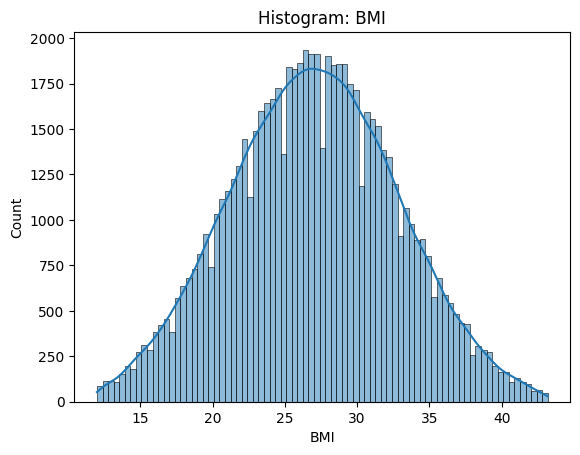

In [246]:
# BMI
sns.histplot(mv_data, x='BMI', kde=True)
plt.title('Histogram: BMI')
plt.xlabel('BMI')
plt.ylabel('Count')

Weight

Text(0, 0.5, 'Count')

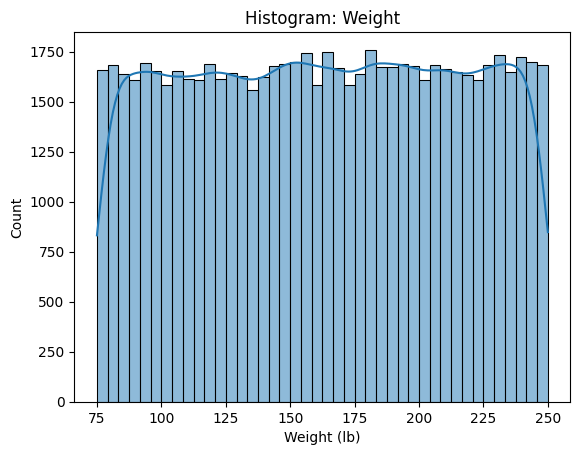

In [247]:
# Weight
sns.histplot(mv_data, x='weight', kde=True)
plt.title('Histogram: Weight')
plt.xlabel('Weight (lb)')
plt.ylabel('Count')

Sleep Duration

Text(0, 0.5, 'Count')

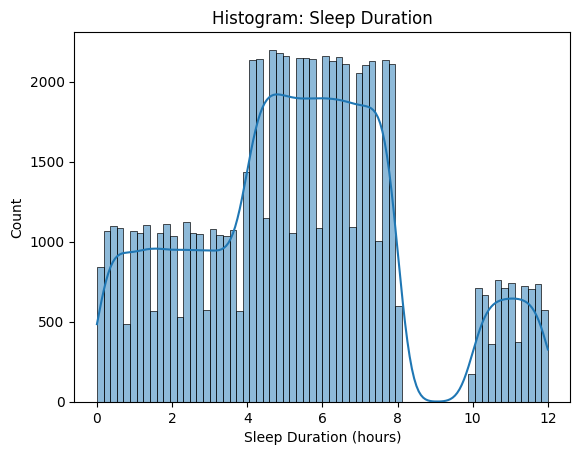

In [248]:
# Sleep Duration
sns.histplot(mv_data['sleep_duration'], kde=True)
plt.title('Histogram: Sleep Duration')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Count')

**Data Imputations**

Age

The `age` variable has a non uniform distribution. Therefore to input the missing values, is is necessary to use bins for the the different spike-points and leverage the mean of each bin to input missing values in the same proportion as they occur in the data. With this approach the resulting data distribution is altered due to the concentration of data around the mean of each bin, though preserving the nature of the relationship across variables.

Text(0, 0.5, 'Count')

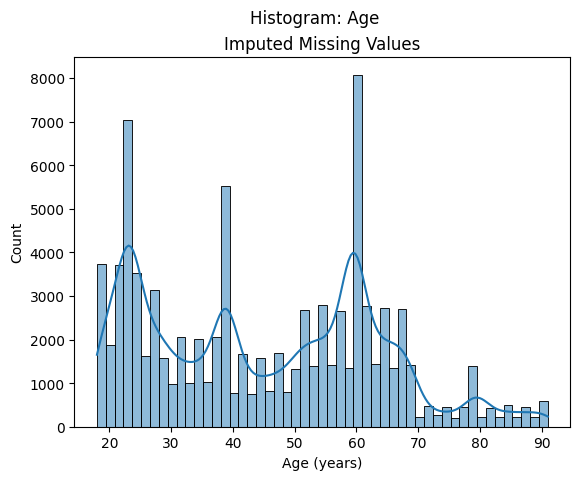

In [249]:
# Impute missing values for age (sampling from a weighed list with the mean across 5 bins of ages)
age_ranges = [(18, 30), (30, 50), (50, 70), (70, 90), (90, 92), (92, 100)]
total_count = mv_data['age'].notnull().sum()
missing_indices = mv_data['age'].isnull()
mean_ages = []
prob_ages = []

for i in range (len(age_ranges) - 1):
    bin_filter = (mv_data['age'] >= age_ranges[i][0]) & (mv_data['age'] < age_ranges[i+1][0])
    mean_ages.append(float(mv_data.loc[bin_filter, 'age'].mean()))
    prob_ages.append(float(len(mv_data.loc[bin_filter, 'age']) / total_count))

sample_ages = pd.Series(
    np.random.choice(mean_ages, size=missing_indices.sum(), p=prob_ages),
    index=mv_data.index[missing_indices])

mv_data.loc[missing_indices, 'age'] = sample_ages

# Regenerates the Histogram
sns.histplot(mv_data, x = 'age', kde=True)
plt.suptitle('Histogram: Age')
plt.title('Imputed Missing Values')
plt.xlabel('Age (years)')
plt.ylabel('Count')

BMI

The `BMI` variable approximates a normal distribution which can be leveraged to input its missing values by sampling from a normal distribution with the corresponding mean and std. This approach is an approximation based on the low correlation with other numerical variables, as well as the random nature of the missing values. It also aims to preserve the nature of the relationship with the categorical variables

Text(0, 0.5, 'Count')

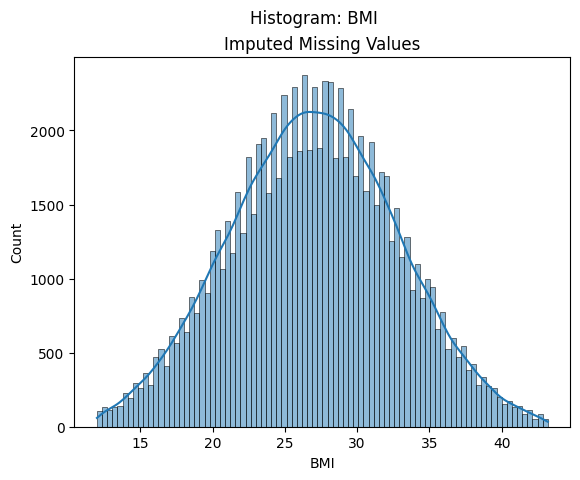

In [250]:
# Impute missing values for BMI (normal distribution sampling)
mean_bmi = float(mv_data['BMI'].mean())
std_bmi = float(mv_data['BMI'].std())

min_val = 12
max_val = mv_data['BMI'].max()

missing_filter = mv_data['BMI'].isnull()

# Generate values and reject those outside the range
samples_bmi = []
while len(samples_bmi) < missing_filter.sum():
    sample = np.random.normal(loc=mean_bmi, scale=std_bmi, size=missing_filter.sum())
    filtered = sample[(sample >= min_val) & (sample <= max_val)]
    samples_bmi.extend(filtered)

mv_data.loc[missing_filter, 'BMI'] = samples_bmi[:missing_filter.sum()]

#Regenerates Histogram
sns.histplot(mv_data,x='BMI', kde=True)
plt.suptitle('Histogram: BMI')
plt.title('Imputed Missing Values')
plt.xlabel('BMI')
plt.ylabel('Count')

Weight

The `Weight` variable approximates a uniform distribution which can be leveraged to input its missing values by sampling from a uniform distribution with the corresponding min and max values. This approach is an approximation based on the low correlation with other numerical variables, as well as the random nature of the missing values. It also aims to preserve the nature of the relationship with the categorical variables

Text(0, 0.5, 'Count')

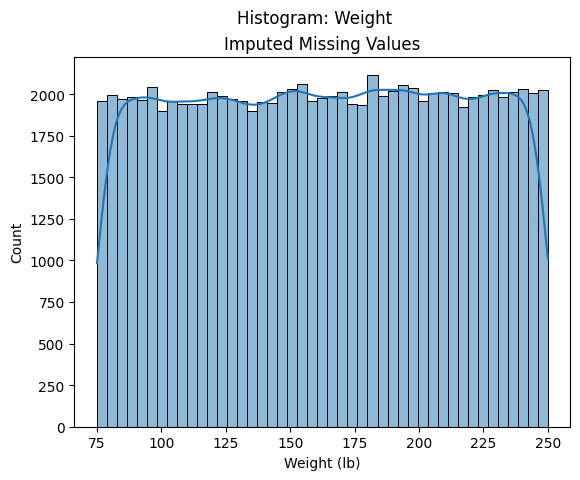

In [251]:
# Impute missing values for weight (uniform distribution sampling)
min_weight = float(mv_data['weight'].min())
max_weight = float(mv_data['weight'].max())

missing_filter = mv_data['weight'].isnull()
mv_data.loc[missing_filter, 'weight'] = np.random.uniform(min_weight, max_weight, size=missing_filter.sum())

# Regenerates histogram
sns.histplot(mv_data, x='weight', kde=True)
plt.suptitle('Histogram: Weight')
plt.title('Imputed Missing Values')
plt.xlabel('Weight (lb)')
plt.ylabel('Count')

Sleeping Duration

In a similar form to the distribution found for the `age` varibale, the `sleeping_duration` variable has a non-uniform distribution. Therefore, a similar approach, leveraging bins and the mean per bin, can be used to input the missing values.

Text(0, 0.5, 'Count')

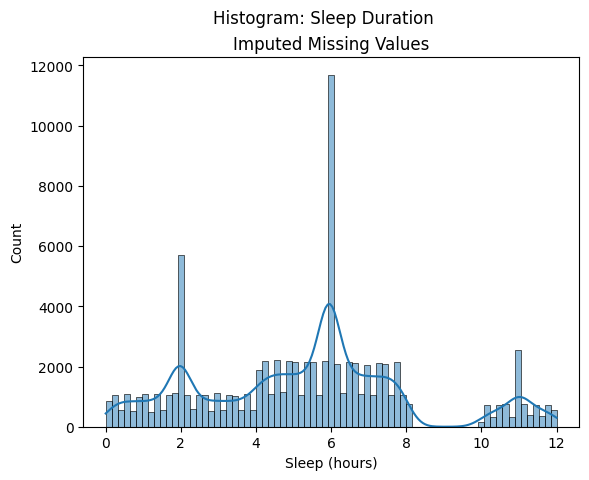

In [252]:
# Impute missing values for sleeping duration (sampling from a weighed list with the mean across bins of sleep hours)
sleep_ranges = [(0, 4), (4, 8), (8, 10), (10, 13), (13, 24)]
total_count = mv_data['sleep_duration'].notnull().sum()
missing_indices = mv_data['sleep_duration'].isnull()
mean_sleep = []
prob_sleep = []

for i in range (len(sleep_ranges) - 1):
    bin_filter = (mv_data['sleep_duration'] >= sleep_ranges[i][0]) & (mv_data['sleep_duration'] < sleep_ranges[i+1][0])
    mean_sleep.append(float(mv_data.loc[bin_filter, 'sleep_duration'].mean()))
    prob_sleep.append(float(len(mv_data.loc[bin_filter, 'sleep_duration']) / total_count))

sample_sleep = pd.Series(np.random.choice(mean_sleep, size=missing_indices.sum(), p=prob_sleep), index=mv_data.index[missing_indices])

mv_data.loc[missing_indices, 'sleep_duration'] = sample_sleep

# Regenerates histogram
sns.histplot(mv_data, x='sleep_duration', kde=True)
plt.suptitle('Histogram: Sleep Duration')
plt.title('Imputed Missing Values')
plt.xlabel('Sleep (hours)')
plt.ylabel('Count')


Pregnancies

For the `pregnacies` variable, assuming the data does not inlcude reccords for transgender individuals, all missing values for males can be replaced with 0. Nonetheless, it is important to double check the assumption with expert input. Furthermore, given the nature and complexity of the `pregnancies` variable a data imputation or interpolation for additional missing values is not appropriate. Pregnacies are a significant health events which involves complex variable interactions which may be masked or lead to confounding results.

In [253]:
mv_data.loc[(mv_data['gender'] == 'male') & (mv_data['pregnancies'].isna()), 'pregnancies'] = 0